In [ ]:
from rgrow.sdc import SDCParams, SDCStrand, SDC
from rgrow import State 

In [3]:
def mean_energies(strand_length: int = 10) -> tuple[float, float]:
    return (
        -1.405625 * (strand_length-1),
        -0.02201875 * (strand_length-1)
    )

In [10]:

def make_bitcopy(N, input="0", conc=1e-7, cdl=10, sdl=20):
    strands = []

    match input:
        case "0":
            conc0 = 1e-7
            conc1 = 0
        case "1":
            conc0 = 0
            conc1 = 1e-7


    strands.append(SDCStrand(conc0, "c0", "sc0", "c0*", "input0", color="blue"))
    strands.append(SDCStrand(conc1, "c1", "sc0", "c1*", "input1", color="red"))

    for i in range(1,N):
        strands.append(SDCStrand(conc, "c0", f"sc{i}", "c0*", f"{i}_0", color="teal"))
        strands.append(SDCStrand(conc, "c1", f"sc{i}", "c1*", f"{i}_1", color="orange"))

    params = SDCParams(
        strands=strands,
        glue_dg_s = (
            {"c0": mean_energies(cdl)} |
            {"c1": mean_energies(cdl)} |
            {f"sc{i}": mean_energies(sdl) if i != 4 else mean_energies(sdl+10) for i in range(0,N) }
        ),
        scaffold = [f"sc{i}*" for i in range(0,N)]
    )

    return SDC(params)


In [11]:
sys = make_bitcopy(10, "0")
state = State((32,12), 'square', 'none', len(sys.tile_names))
sys.update_all(state)
sys.evolve(state, show_window=True)

Exception: rgrow-gui binary (version 0.21.0-pre1) not found. The GUI functionality requires the rgrow-gui package to be installed.

For Python installations, ensure rgrow-gui is installed:
  pip install rgrow-gui

For Rust installations, ensure rgrow-gui is built and available on PATH:
  cargo build --package rgrow-gui

Note: GUI support may be optional in future versions.

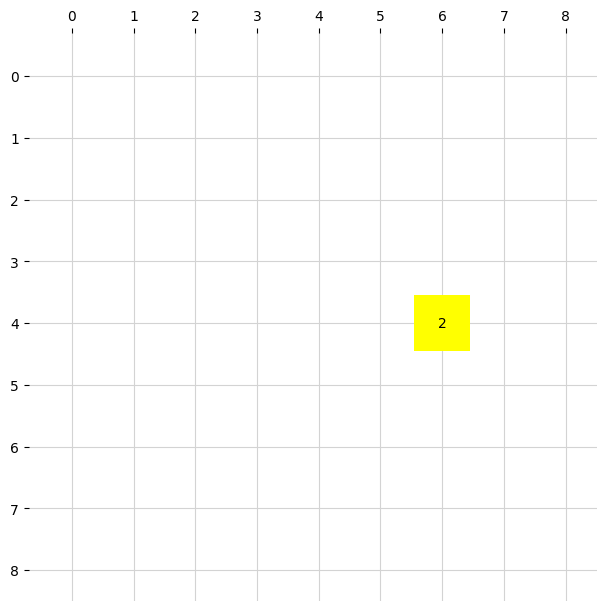

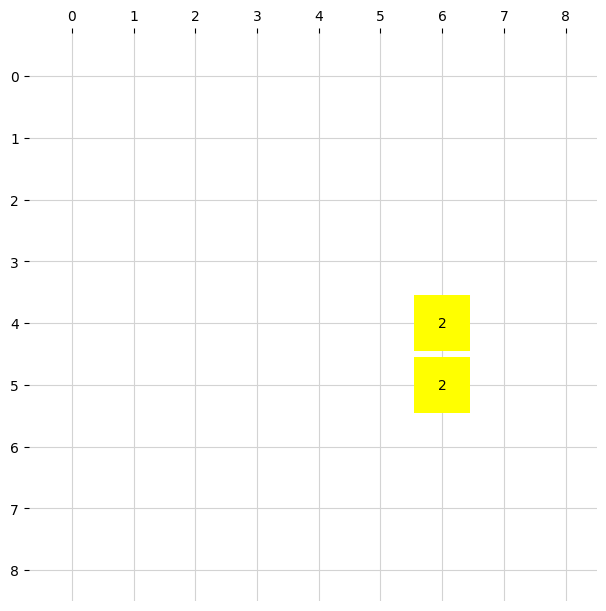

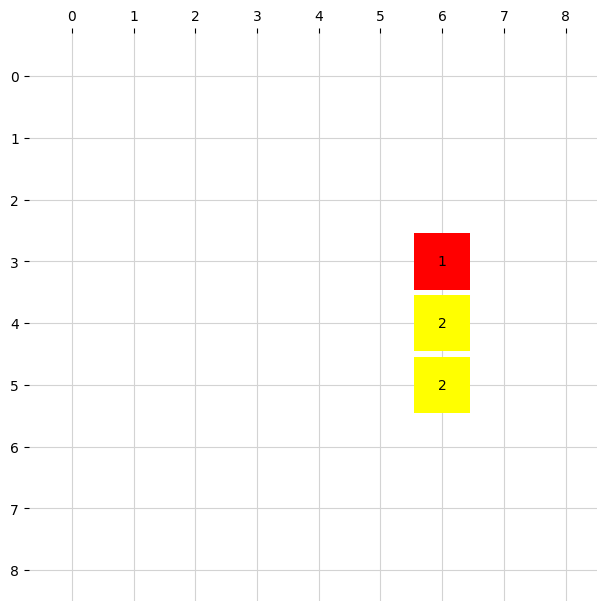

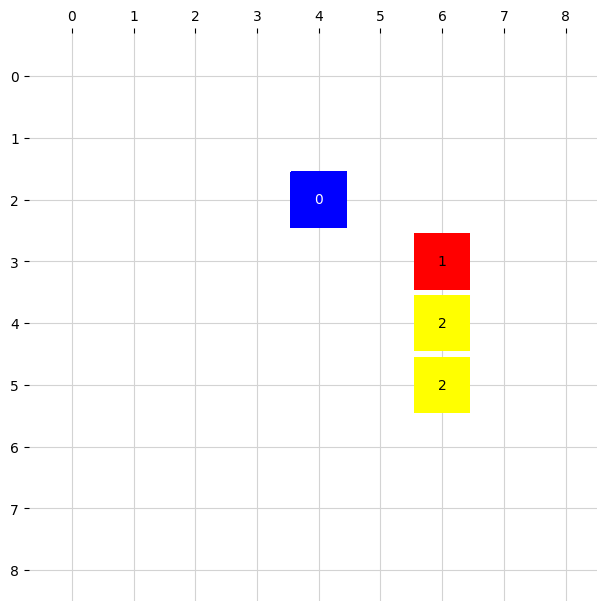

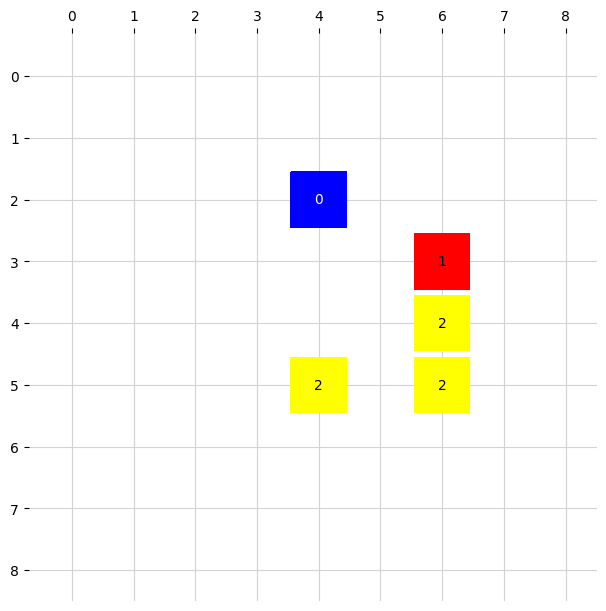

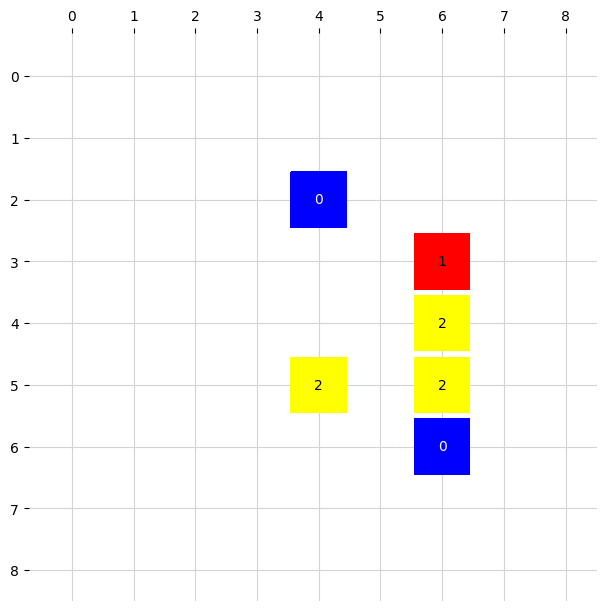

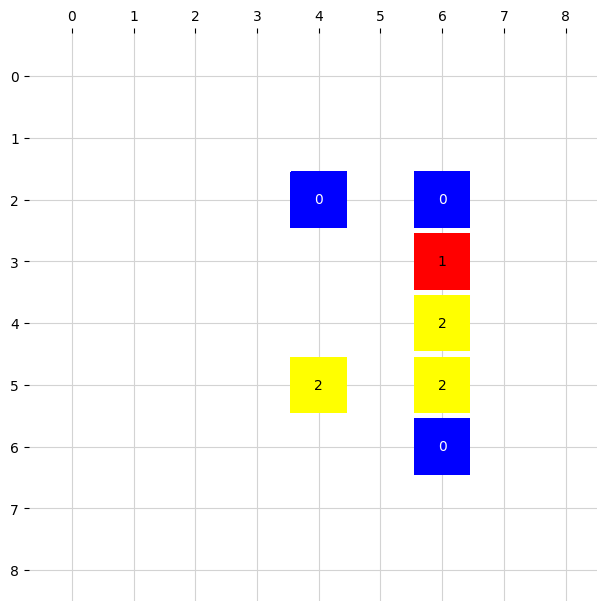

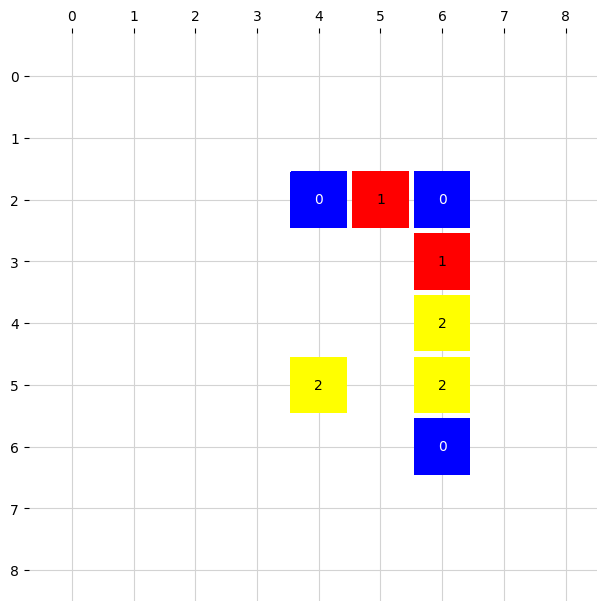

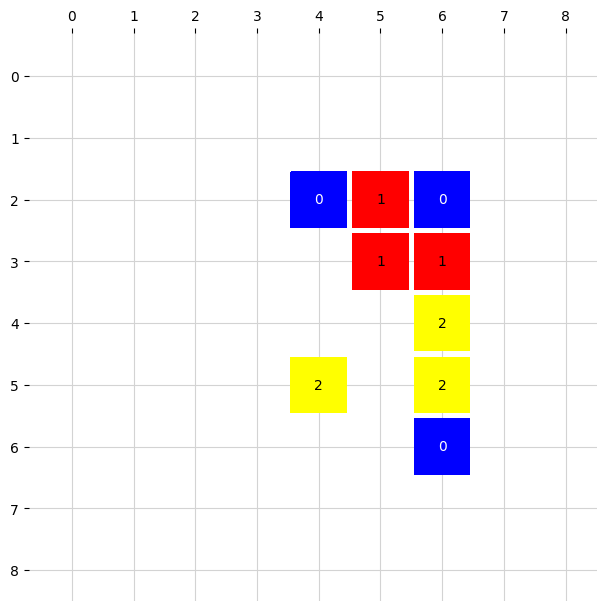

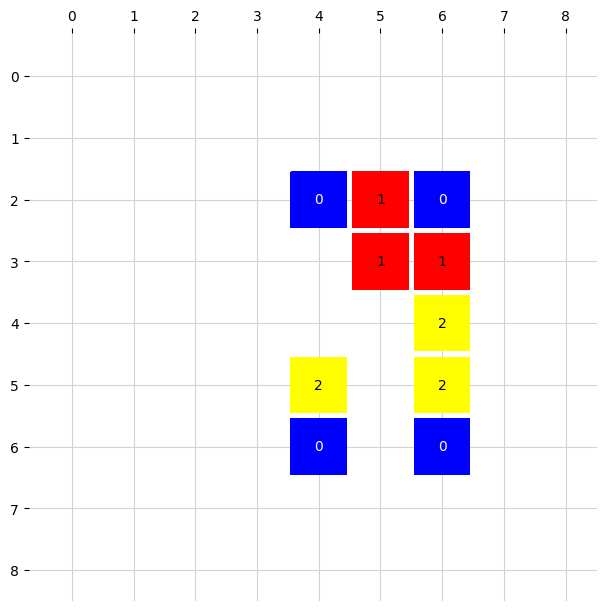

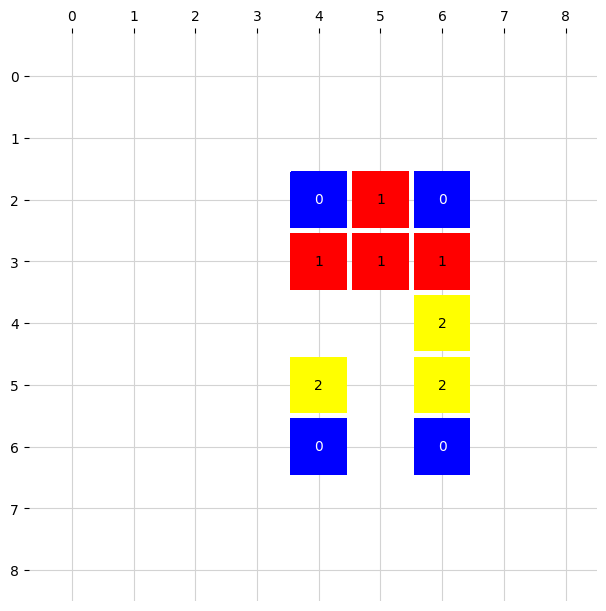

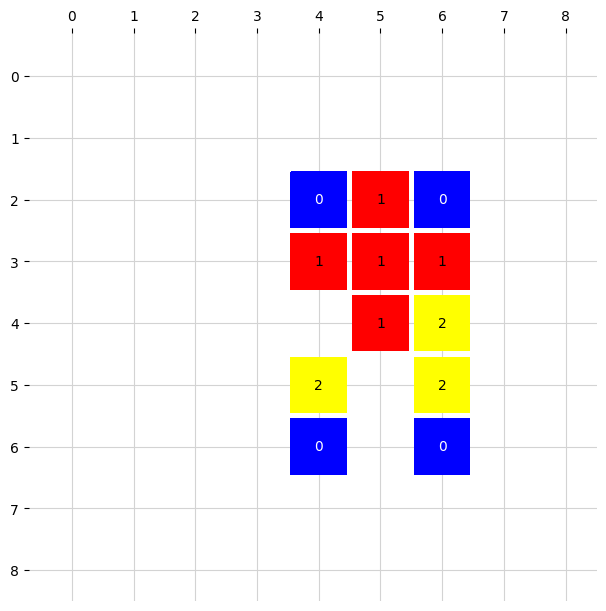

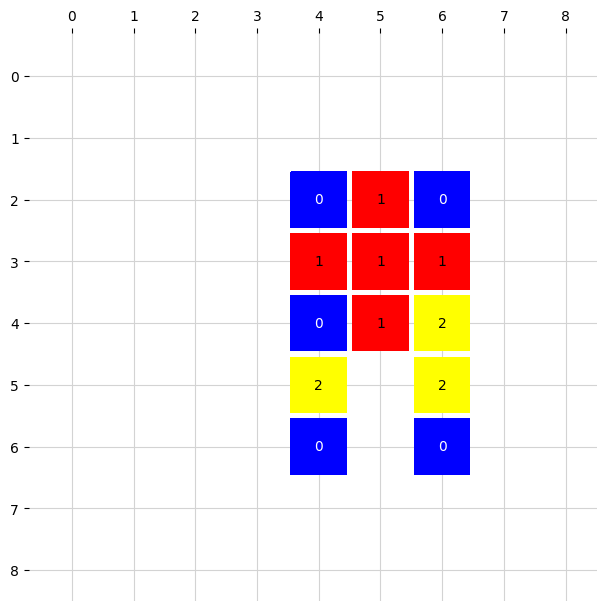

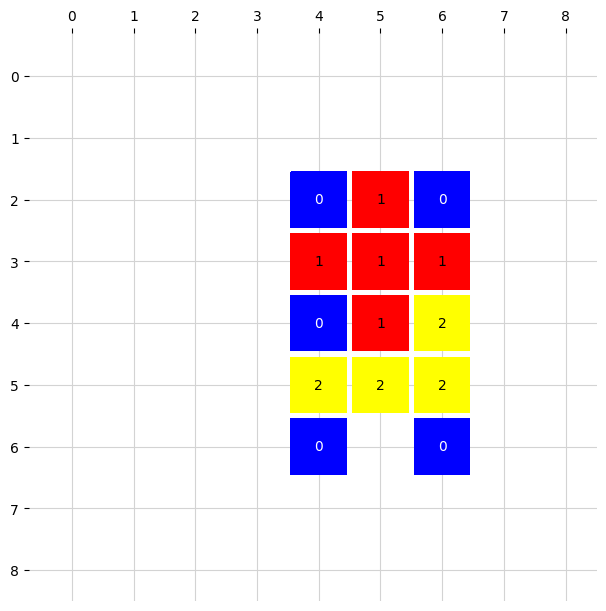

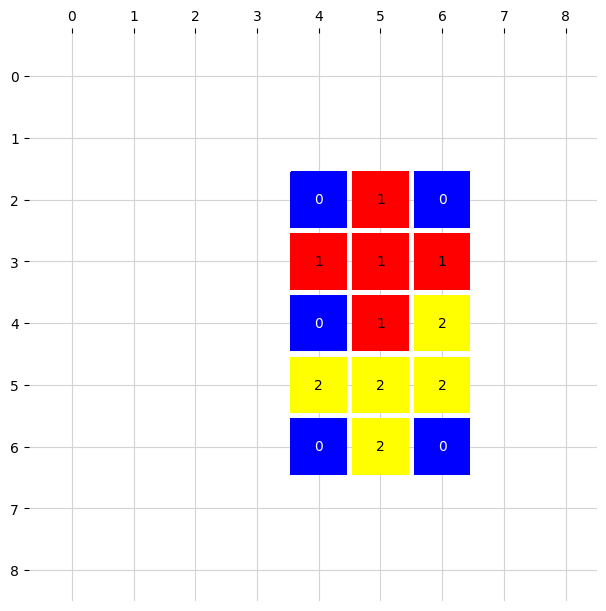

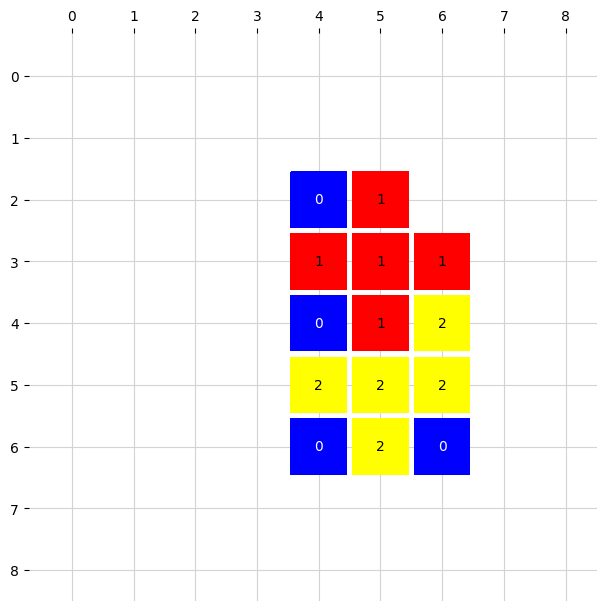

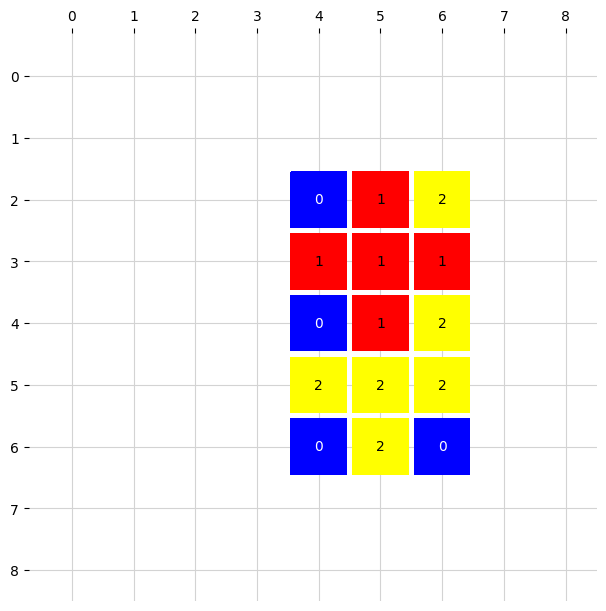

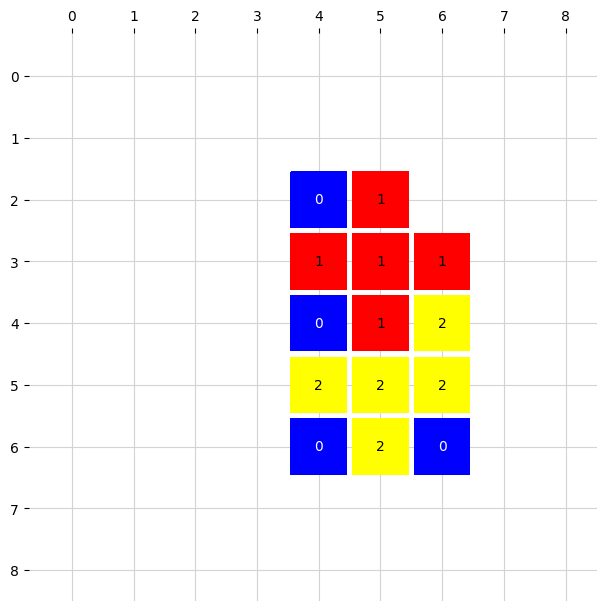

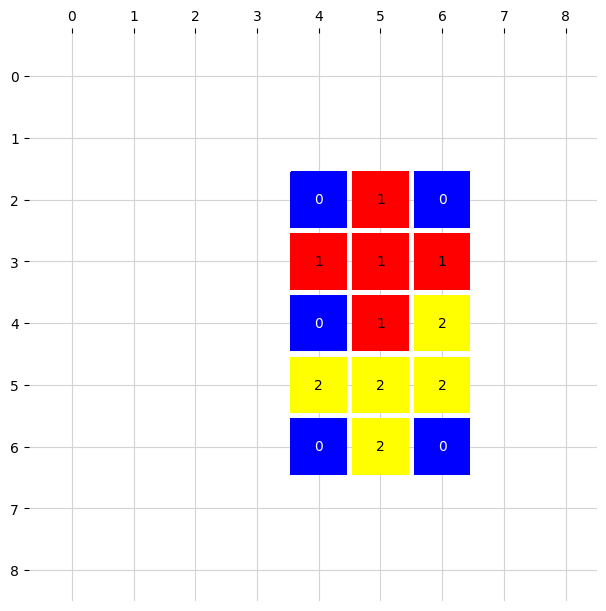

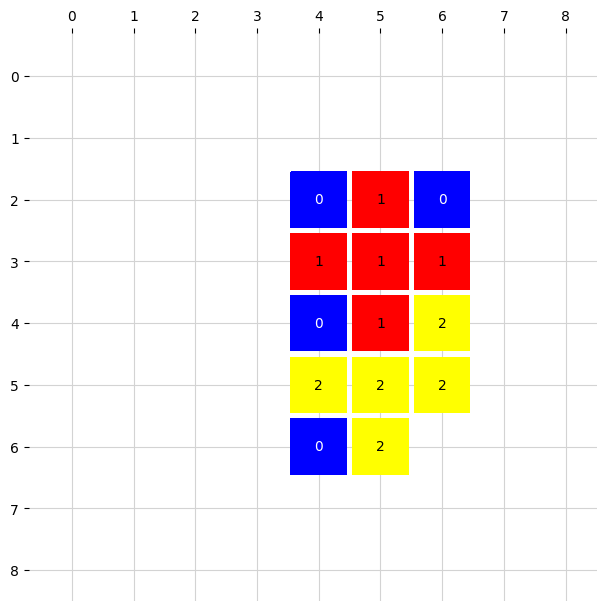

In [ ]:
# sys = SDC(params)
# state = rg.State((9,9), 'square', 'none', 4)
# sys.update_all(state)
# for i in range(20):
#     sys.evolve(state, for_events = 1)
#     state
#     sys.plot_canvas(state, annotate_tiles = True)